In [82]:
#to be run in Input_Masks directory
import numpy as np
import os
from PIL import Image

ROOT_DIR='/home/lachlan/CODEBASE/SEM_segmentation/Testing/BT386C2'
BG_DIR='Input_Backgrounds'
IMG_DIR='Input_Images'
SINGLE_DIR='Input_Singles'

bgdir=os.path.join(ROOT_DIR, BG_DIR)
singledir=os.path.join(ROOT_DIR, SINGLE_DIR)
rawdir=os.path.join(ROOT_DIR, IMG_DIR)


In [85]:
def calc(img):
    out=np.reshape(img, -1)
    #print(out, out.shape, np.max(out))
    nmax=int(len(out)*0.001)
    #print(f"nmax: {nmax}")
    indices = np.argsort(out)
    out=out[indices]
    #print(out, out.shape)
    out = out[-nmax : ]
    #print(out, out.shape)
    return np.mean(out)

def extractimg(dir):
    flist = os.listdir(dir)
    fname = flist[0]
    file=os.path.join(dir, fname)
    img=np.asarray(Image.open(file), dtype='float32')

    return img

rawimg=extractimg(rawdir)
print("RAW")
print(calc(rawimg))
print(np.mean(rawimg))

bgimg=extractimg(bgdir)
print("BG")
bgresult=calc(bgimg)
print(bgresult)
print(bgresult*1.05)

print("SINGLES")
for file in sorted(os.listdir(singledir)):
    file=os.path.join(singledir, file)
    simg=np.asarray(Image.open(file), dtype='float32')
    print(calc(simg))




127.5
RAW
249.19963
98.47796
BG
110.64025
116.17226371765138
SINGLES
117.63265
110.29252
124.65987
142.84354
157.88435
255.0


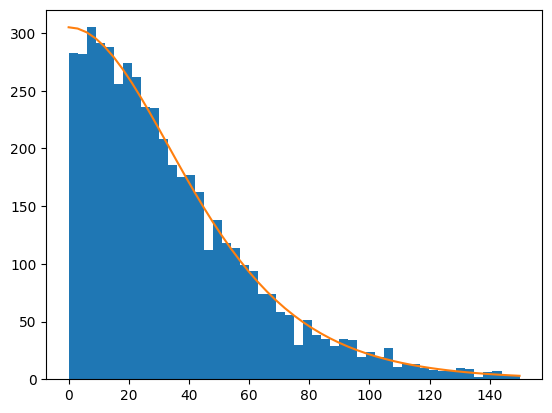

In [95]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.logistic.html
#maybe use logistic function instead of np.random to map no. particles per tile?
#not sure, probably some kind of binomial with single and clustered particles

loc, scale = 0, 25
s = np.random.logistic(loc, scale, 10000)
s = s[s>=0]
s = s[s<=150]

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=50)


def logist(x, loc, scale):
    return np.exp((loc-x)/scale)/(scale*(1+np.exp((loc-x)/scale))**2)
lgst_val = logist(bins, loc, scale)
plt.plot(bins, lgst_val * count.max() / lgst_val.max())
plt.show()